In [13]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use('seaborn-whitegrid')
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('middle_tn_schools.csv')

In [6]:
df.sample(5)

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
215,Northeast Elementary,3.0,854.0,38.0,60.6,55.4,14.4,Public,54.2,57.6,59.0,22.0,50.6,1.8,15.0
119,Holston View Elementary,5.0,370.0,38.0,95.7,86.2,14.2,Public,78.6,91.1,26.0,0.8,91.1,0.5,3.0
32,Cason Lane Academy,3.0,723.0,45.0,51.5,61.2,13.3,Public,57.8,50.4,54.0,16.3,56.4,9.5,10.1
238,Portland West Middle School,3.0,528.0,52.0,57.7,40.0,14.2,Public,46.1,56.2,37.0,6.3,86.0,0.6,6.1
75,Fall-Hamilton Elementary,1.0,327.0,73.0,28.1,14.8,11.6,Public Magnet,23.2,34.8,28.0,64.8,14.1,0.9,18.7


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
school_rating,347.0,2.968300,1.690377,0.0,2.00,3.0,4.00,5.0
size,347.0,699.472622,400.598636,53.0,420.50,595.0,851.00,2314.0
reduced_lunch,347.0,50.279539,25.480236,2.0,30.00,51.0,71.50,98.0
state_percentile_16,347.0,58.801729,32.540747,0.2,30.95,66.4,88.00,99.8
state_percentile_15,341.0,58.249267,32.702630,0.6,27.10,65.8,88.60,99.8
stu_teach_ratio,347.0,15.461671,5.725170,4.7,13.70,15.0,16.70,111.0
avg_score_15,341.0,57.004692,26.696450,1.5,37.60,61.8,79.60,99.0
avg_score_16,347.0,57.049856,27.968974,0.1,37.00,60.7,80.25,98.9
full_time_teachers,347.0,44.939481,22.053386,2.0,30.00,40.0,54.00,140.0
percent_black,347.0,21.197983,23.562538,0.0,3.60,13.5,28.35,97.4


In [9]:
df.shape

(347, 15)

In [10]:
df.school_rating[:5]

0    5.0
1    2.0
2    4.0
3    0.0
4    4.0
Name: school_rating, dtype: float64

In [12]:
df[['reduced_lunch','school_rating']].head()

,reduced_lunch,school_rating
0,10.0,5.0
1,71.0,2.0
2,43.0,4.0
3,91.0,0.0
4,26.0,4.0


<AxesSubplot:>

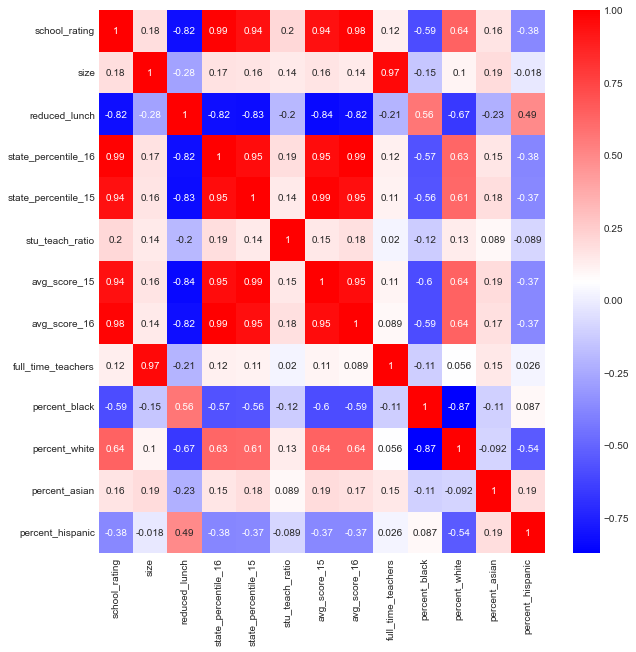

In [15]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='bwr')

In [18]:
df.groupby(['school_rating']).count()

,name,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
school_rating,,,,,,,,,,,,,,
0.0,43,43,43,43,42,43,43,42,43,43,43,43,43,43
1.0,40,40,40,40,38,40,40,38,40,40,40,40,40,40
2.0,44,44,44,44,43,44,44,43,44,44,44,44,44,44
3.0,56,56,56,56,56,56,56,56,56,56,56,56,56,56
4.0,86,86,86,86,85,86,86,85,86,86,86,86,86,86
5.0,78,78,78,78,77,78,78,77,78,78,78,78,78,78


In [26]:
df.isnull().sum()

name                   0
school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    6
stu_teach_ratio        0
school_type            0
avg_score_15           6
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

In [23]:
df2=pd.read_csv('SalaryGender.csv',delimiter=',')

In [24]:
df2.head()

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


In [25]:
df2.isnull().any()

Salary    False
Gender    False
Age       False
PhD       False
dtype: bool

In [28]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df['state_percentile_15']=imputer.fit_transform(df[['state_percentile_15']])

In [30]:
df.state_percentile_15.isnull().sum()

0